In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
import itertools

import seaborn as sns


In [3]:
df = pd.read_csv("cp1_data/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [4]:
df['Question'].unique()

array(['Percent of adults aged 18 years and older who have obesity',
       'Percent of adults aged 18 years and older who have an overweight classification',
       'Percent of adults who report consuming fruit less than one time daily',
       'Percent of adults who report consuming vegetables less than one time daily',
       'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity 

In [5]:
df['QuestionID'].unique()

array(['Q036', 'Q037', 'Q018', 'Q019', 'Q046', 'Q043', 'Q044', 'Q045',
       'Q047'], dtype=object)

In [22]:
df['Question'].unique()

array(['Percent of adults aged 18 years and older who have obesity',
       'Percent of adults aged 18 years and older who have an overweight classification',
       'Percent of adults who report consuming fruit less than one time daily',
       'Percent of adults who report consuming vegetables less than one time daily',
       'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity 

In [21]:
df['LocationID' ].unique()

array([ 1, 59,  2,  4,  5,  6,  9,  8, 10, 12, 11, 13, 66, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 72, 44, 45, 46, 47, 48, 49, 50, 51, 54,
       53, 55, 56, 78], dtype=int64)

In [6]:
df.head()
#df1['DataValueTypeID'].unique()


,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [7]:
df.isnull().sum()

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Unit               53392
Data_Value_Type                   0
Data_Value                     5046
Data_Value_Alt                 5046
Data_Value_Footnote_Symbol    48346
Data_Value_Footnote           48346
Low_Confidence_Limit           5046
High_Confidence_Limit          5046
Sample_Size                    5046
Total                         51485
Age(years)                    41954
Education                     45764
Gender                        49578
Income                        40043
Race/Ethnicity                38136
GeoLocation                    1008
ClassID                           0
TopicID                           0
QuestionID                        0
DataValueTypeID             

In [8]:

df.dropna(subset=['Data_Value'], inplace=True)
df.isnull().sum()

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Unit               48346
Data_Value_Type                   0
Data_Value                        0
Data_Value_Alt                    0
Data_Value_Footnote_Symbol    48346
Data_Value_Footnote           48346
Low_Confidence_Limit              0
High_Confidence_Limit             0
Sample_Size                       0
Total                         46439
Age(years)                    36908
Education                     40718
Gender                        44532
Income                        34997
Race/Ethnicity                38136
GeoLocation                    1008
ClassID                           0
TopicID                           0
QuestionID                        0
DataValueTypeID             

In [9]:
corelation= df.corr()
print(corelation['Data_Value'].sort_values(ascending=False))


Data_Value                1.000000
Data_Value_Alt            1.000000
Low_Confidence_Limit      0.956605
High_Confidence_Limit     0.941565
YearStart                -0.001504
YearEnd                  -0.001504
LocationID               -0.002525
Sample_Size              -0.005854
Data_Value_Unit                NaN
Name: Data_Value, dtype: float64


In [10]:
#add a column to df to give unique int to each question_id
df['QuestionID'] = pd.factorize(df['QuestionID'])[0] 
df['QuestionID'].unique()


df['QuestionID'][:5]



0    0
1    0
2    0
3    0
4    0
Name: QuestionID, dtype: int64

In [11]:
corelation= df.corr()
print(corelation['Data_Value'].sort_values(ascending=False))

Data_Value                1.000000
Data_Value_Alt            1.000000
Low_Confidence_Limit      0.956605
High_Confidence_Limit     0.941565
YearStart                -0.001504
YearEnd                  -0.001504
LocationID               -0.002525
Sample_Size              -0.005854
QuestionID               -0.177742
Data_Value_Unit                NaN
Name: Data_Value, dtype: float64


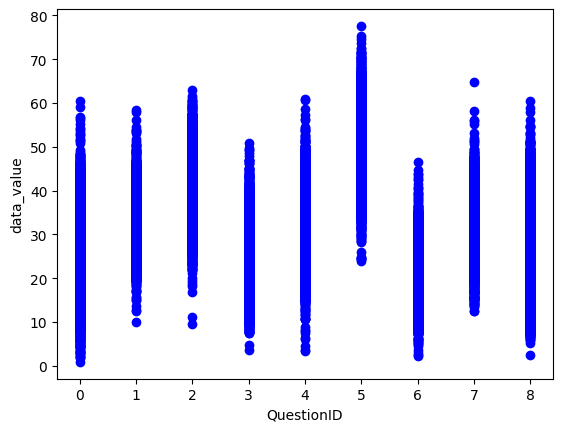

In [12]:
plt.scatter(df.QuestionID , df.Data_Value,  color='blue')
plt.xlabel("QuestionID")
plt.ylabel("data_value")
plt.show()

In [13]:
#create 9 dataframes for each question
df1 = df[df['QuestionID'] == 0]
df2 = df[df['QuestionID'] == 1]
df3 = df[df['QuestionID'] == 2]
df4 = df[df['QuestionID'] == 3]
df5 = df[df['QuestionID'] == 4]
df6 = df[df['QuestionID'] == 5]
df7 = df[df['QuestionID'] == 6]
df8 = df[df['QuestionID'] == 7]
df9 = df[df['QuestionID'] == 8]


Now we will first work with df1 , ie : obesity related data

In [14]:
df1.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,0,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,0,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,0,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,0,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,0,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


Now lets first see the relation of age and obesity

In [15]:
#remove all row other than where Age(years) is notnull
df1.dropna(subset=['Age(years)'], inplace=True)


C:\Users\Asus\AppData\Local\Temp\ipykernel_22712\1460292113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(subset=['Age(years)'], inplace=True)


In [16]:
df1.head()


,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
7,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,0,VALUE,1,Age (years),18 - 24,AGEYR,AGEYR1824
8,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,0,VALUE,1,Age (years),25 - 34,AGEYR,AGEYR2534
9,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,0,VALUE,1,Age (years),35 - 44,AGEYR,AGEYR3544
10,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,0,VALUE,1,Age (years),45 - 54,AGEYR,AGEYR4554
11,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,0,VALUE,1,Age (years),55 - 64,AGEYR,AGEYR5564


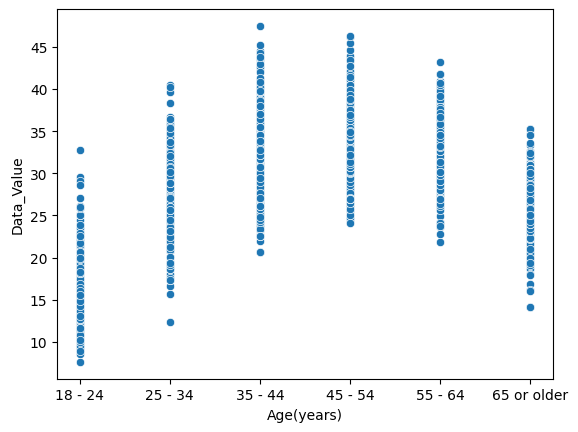

In [17]:
sns.scatterplot(x="Age(years)", y="Data_Value", data=df1)
plt.show()

Lets now train a lenear regression on the above data
